In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice

In [2]:
path = 'C:/Users/82109/Desktop'

In [3]:
가사 = pd.read_excel(path + "/키워드 추출/lyrics_summary_final.xlsx", index_col=0)

In [4]:
가사.isnull().sum()

url               0
name              0
id                0
Artist            0
lyrics            0
lyrics_english    0
summary           0
dtype: int64

In [5]:
가사.head(3)

,url,name,id,Artist,lyrics,lyrics_english,summary
0.0,https://open.spotify.com/track/0eFMbKCRw8KByXy...,Still With You,0eFMbKCRw8KByXyWBw8WO7,Jung Kook,날 스치는 그대의 옅은 그 목소리\n내 이름을 한 번만 더 불러주세요\n얼어버린 노...,Your pale voice\nPlease call my name once more...,<pad> if face again wanted see eyes and told I...
1.0,https://open.spotify.com/track/7eJMfftS33KTjuF...,death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,Powfu,Don t stay awake for too long don t go to bed...,Don t stay awake for too long don t go to bed...,<pad> don t stay awake for too long don t go t...
2.0,https://open.spotify.com/track/2CbGuO0LtVvbh3u...,Nan-Nan,2CbGuO0LtVvbh3umN3mDwM,Fujii Kaze,あんたのその歯に はさがった青さ粉に\nふれるべきか否かで少し悩んでる\n口にしない方がいい...,In the bluish powder that has exposed to your ...,<pad> what is it Before I said Then what Why d...


In [6]:
가사.duplicated().sum()

6989

In [7]:
가사.shape

(21027, 7)

In [8]:
가사['summary'][0]

"<pad> if face again wanted see eyes and told In ecstatic memory Even if dance alone, it rains When fog is lifted, 'll run wet feet Hug me then <unk> Because that moon looks lonely think'm crying brightly in night sky Even though know that morning is coming someday wanted stay in your sky like star The moment day would have captured more if knew it would be like If face again wanted see eyes and told In ecstatic memory Even if dance alone, it rains When fog is lifted</s>"

### 텍스트 전처리

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
#영어 불용어 사전
stops = set(stopwords.words('english'))


#특수문자 제거
#영어 대소문자, 숫자, 공백문자(스페이스, 탭, 줄바꿈 등) 아닌 문자들 제거
def remove_special_characters(text, remove_digits=True):
    text=re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text


#불용어 제거
def delete_stops(text):
    text = text.lower().split()
    text = ' '.join([word for word in text if word not in stops])
    return text
   
    
#품사 tag 매칭용 함수
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

#품사 태깅 + 표제어 추출
def tockenize(text):
    tokens=word_tokenize(text)
    pos_tokens=nltk.pos_tag(tokens)
    
    text_t=list()
    for _ in pos_tokens:
        text_t.append([_[0], get_wordnet_pos(_[1])])
    
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word[0], word[1]) for word in text_t])
    return text



def clean(text):
    text = remove_special_characters(text, remove_digits=True)
    text = delete_stops(text)
    text = tockenize(text)
    return text

불필요하게 존재하는 `<pad>`를 제거 과정도 추가

In [21]:
cnt=0
for line in 가사['summary']:
    if line.startswith('<pad>'):
        cnt+=1
cnt

21027

In [22]:
text_c=list()

for t in 가사['summary']:
    t=t[5:]
    t = clean(t)
    text_c.append(t)

가사['key_word'] = text_c

In [24]:
가사.iloc[0,:]['lyrics']

'날 스치는 그대의 옅은 그 목소리\n내 이름을 한 번만 더 불러주세요\n얼어버린 노을 아래 멈춰 서 있지만\n그대 향해 한 걸음씩 걸어갈래요  still with you\n♪\n어두운 방  조명 하나 없이\n익숙해지면 안 되는데 그게 또 익숙해\n나지막이 들리는 이 에어컨 소리\n이거라도 없으면 나 정말 무너질 것 같아\n함께 웃고  함께 울고\n이 단순한 감정들이 내겐 전부였나 봐\n언제쯤일까 다시  그댈 마주한다면\n눈을 보고 말할래요  보고 싶었어요 \n황홀했던 기억 속에\n나 홀로 춤을 춰도 비가 내리잖아\n이 안개가 걷힐 때쯤 젖은 발로 달려갈게\n그때 날 안아줘\n♪\n저 달이 외로워 보여서\n밤하늘에 환하게 울고 있는 것 같아서\n언젠가 아침이 오는 걸 알면서도\n별처럼 너의 하늘에 머물고 싶었어  아 \n하루를  그 순간을\n이렇게 될 걸 알았다면 더 담아뒀을 텐데\n언제쯤일까 다시  그댈 마주한다면\n눈을 보고 말할래요  보고 싶었어요 \n황홀했던 기억 속에\n나 홀로 춤을 춰도 비가 내리잖아\n이 안개가 걷힐 때쯤 젖은 발로 달려갈게\n그때 날 잡아줘\nAh ah ah ah  ah ah ah ah\nAh ah ah  mmh  mmh\nAh ah ah ah  ah ah ah ah\nAh ah ah  ah ah  ah ah\n날 바라보는 희미한 미소 뒤편에\n아름다운 보랏빛을 그려볼래요\n서로 발걸음이 안 맞을 수도 있지만\n그대와 함께 이 길을 걷고 싶어요  still with you\n'

In [25]:
가사.iloc[0,:]['summary']

"<pad> if face again wanted see eyes and told In ecstatic memory Even if dance alone, it rains When fog is lifted, 'll run wet feet Hug me then <unk> Because that moon looks lonely think'm crying brightly in night sky Even though know that morning is coming someday wanted stay in your sky like star The moment day would have captured more if knew it would be like If face again wanted see eyes and told In ecstatic memory Even if dance alone, it rains When fog is lifted</s>"

In [26]:
가사.iloc[0,:]['key_word']

'face want see eye tell ecstatic memory even dance alone rain fog lift run wet foot hug unk moon look lonely thinkm cry brightly night sky even though know morning come someday want stay sky like star moment day would capture knew would like face want see eye tell ecstatic memory even dance alone rain fog lifteds'

In [28]:
가사.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21027 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             21027 non-null  object
 1   name            21027 non-null  object
 2   id              21027 non-null  object
 3   Artist          21027 non-null  object
 4   lyrics          21027 non-null  object
 5   lyrics_english  21027 non-null  object
 6   summary         21027 non-null  object
 7   key_word        21027 non-null  object
dtypes: object(8)
memory usage: 1.9+ MB


In [27]:
가사.to_excel(path+"/키워드 추출/song_keyword.xlsx")

### 전체 노래 정보 합치기

In [92]:
one = pd.read_csv(path + "/노래 분류/k=6/cluster1_2.csv", index_col=0, encoding='cp949')
two = pd.read_csv(path + "/노래 분류/k=6/cluster2_2.csv", index_col=0, encoding='cp949')
thr = pd.read_csv(path + "/노래 분류/k=6/cluster3_2.csv", index_col=0, encoding='cp949')
fou = pd.read_excel(path + "/노래 분류/k=6/cluster4_2.xlsx", index_col=0)
fiv = pd.read_excel(path + "/노래 분류/k=6/cluster5_2.xlsx", index_col=0)
six = pd.read_excel(path + "/노래 분류/k=6/cluster6_2.xlsx", index_col=0)

In [102]:
one.shape

(3181, 7)

In [107]:
one_ly = pd.merge(one, lyrics, on=['id', 'url', 'Artist'])
two_ly = pd.merge(two, lyrics, on=['id', 'url', 'Artist'])
thr_ly = pd.merge(thr, lyrics, on=['id', 'url', 'Artist'])
fou_ly = pd.merge(fou, lyrics, on=['id', 'url', 'Artist'])
fiv_ly = pd.merge(fiv, lyrics, on=['id', 'url', 'Artist'])
six_ly = pd.merge(six, lyrics, on=['id', 'url', 'Artist'])

In [108]:
print(one_ly.shape)
print(two_ly.shape)
print(thr_ly.shape)
print(fou_ly.shape)
print(fiv_ly.shape)
print(six_ly.shape)

(2637, 12)
(3702, 12)
(2399, 12)
(4384, 12)
(2632, 12)
(1012, 12)


In [119]:
thr_ly.iloc[1144,:]

id                                           6e00L1gCpo2G2mXIeX5cDT
url               https://open.spotify.com/track/6e00L1gCpo2G2mX...
Artist                                               Jorge & Mateus
PC1                                                        -0.46676
PC2                                                        0.239489
PC3                                                       -0.174851
clust                                                           2.0
name                    Água de Oceano / Onde Nasce o Sol - Ao Vivo
lyrics            Em pleno deserto te encontrei\nNão imaginava s...
lyrics_english    In the desert I found you\nI couldn't imagine ...
summary           <pad> ô ô ô ô ô ô ô ô ô ô ô ô ô ô ô ô ô ô ô ô ...
key_word                                                           
Name: 1144, dtype: object

In [118]:
one_ly.to_excel(path+"/키워드 추출/song_keyword_culst1.xlsx")
two_ly.to_excel(path+"/키워드 추출/song_keyword_culst2.xlsx")
thr_ly.to_excel(path+"/키워드 추출/song_keyword_culst3.xlsx")
fou_ly.to_excel(path+"/키워드 추출/song_keyword_culst4.xlsx")
fiv_ly.to_excel(path+"/키워드 추출/song_keyword_culst5.xlsx")
six_ly.to_excel(path+"/키워드 추출/song_keyword_culst6.xlsx")

### 노래 가사 단어 시각화

In [50]:
total_key_word = ""
for line in lyrics['key_word']:
    total_key_word+=line

In [52]:
from collections import Counter
word_count = Counter(total_key_word.split())

In [59]:
#빈도수 상위 30
m = 30
pos_top_30 = {}
for word, counts in word_count.most_common(m):
    pos_top_30[word] = counts
    print(f'{word} : {counts}')

oh : 16716
unk : 15413
yeah : 12066
get : 10124
love : 9993
know : 9299
like : 8562
go : 8145
na : 6751
want : 6704
time : 4842
make : 4699
one : 4671
say : 4655
see : 4595
come : 4305
let : 4238
take : 4066
baby : 4036
feel : 3975
ooh : 3876
ah : 3872
la : 3688
tell : 3588
give : 3579
dont : 3575
never : 3449
christmas : 3245
night : 3058
look : 3039


In [54]:
#!pip install wordcloud
from wordcloud import WordCloud
font_path = "C:/Windows/Fonts/H2GTRM"

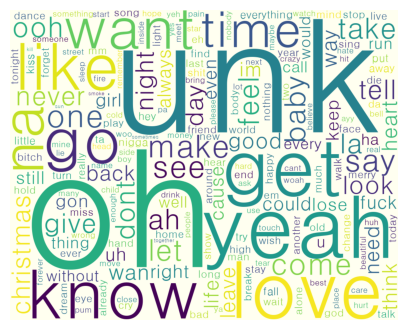

In [55]:
wc = WordCloud(font_path=font_path, background_color='ivory', width=1000, height=800)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(5,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()